In [1]:
import pandas as pd
file_path = "./ref/행정동별 지하철 승객수.xlsx"
df = pd.read_excel(file_path, engine="openpyxl")
df

,일시,행정동,전체,0시~7시,7시~8시,8시~9시,9시~12시,12시~17시,17시~18시,18시~19시,19시~24시
0,2024-10-31,부평구 부평1동,"50,354","4,440","6,180","5,459","7,475","12,324","3,223","3,269","7,984"
1,2024-10-31,중구 운서동,"36,378","2,555","2,376","2,144","4,166","11,207","3,310","3,261","7,359"
2,2024-10-31,연수구 송도1동,"23,988","1,044","1,653","1,565","1,870","6,082","3,118","3,675","4,981"
3,2024-10-31,계양구 계양1동,"23,929","3,103","4,788","3,903","4,595","4,193",952,988,"1,407"
4,2024-10-31,연수구 송도4동,"22,554","1,256","1,935","1,903","2,440","6,335","2,457","2,382","3,846"
...,...,...,...,...,...,...,...,...,...,...,...
151,2024-10-31,남동구 남촌도림동,0,0,0,0,0,0,0,0,0
152,2024-10-31,남동구 만수4동,0,0,0,0,0,0,0,0,0
153,2024-10-31,남동구 만수3동,0,0,0,0,0,0,0,0,0
154,2024-10-31,남동구 만수2동,0,0,0,0,0,0,0,0,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   일시       156 non-null    object
 1   행정동      156 non-null    object
 2   전체       156 non-null    object
 3   0시~7시    156 non-null    object
 4   7시~8시    156 non-null    object
 5   8시~9시    156 non-null    object
 6   9시~12시   156 non-null    object
 7   12시~17시  156 non-null    object
 8   17시~18시  156 non-null    object
 9   18시~19시  156 non-null    object
 10  19시~24시  156 non-null    object
dtypes: object(11)
memory usage: 13.5+ KB


In [3]:
df.columns

Index(['일시', '행정동', '전체', '0시~7시', '7시~8시', '8시~9시', '9시~12시', '12시~17시',
       '17시~18시', '18시~19시', '19시~24시'],
      dtype='object')

In [4]:
columns = ['date', 'name', 'total', '0시~7시', '7시~8시', '8시~9시', '9시~12시', '12시~17시',
       '17시~18시', '18시~19시', '19시~24시']
df.columns = columns
df = df.loc[:,: 'total']
df

,date,name,total
0,2024-10-31,부평구 부평1동,"50,354"
1,2024-10-31,중구 운서동,"36,378"
2,2024-10-31,연수구 송도1동,"23,988"
3,2024-10-31,계양구 계양1동,"23,929"
4,2024-10-31,연수구 송도4동,"22,554"
...,...,...,...
151,2024-10-31,남동구 남촌도림동,0
152,2024-10-31,남동구 만수4동,0
153,2024-10-31,남동구 만수3동,0
154,2024-10-31,남동구 만수2동,0


In [5]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

d2_path = './ref/D2Coding-Ver1.3.2-20180524.ttf'
fm.fontManager.addfont(d2_path)
plt.rcParams["font.family"] = "D2Coding"

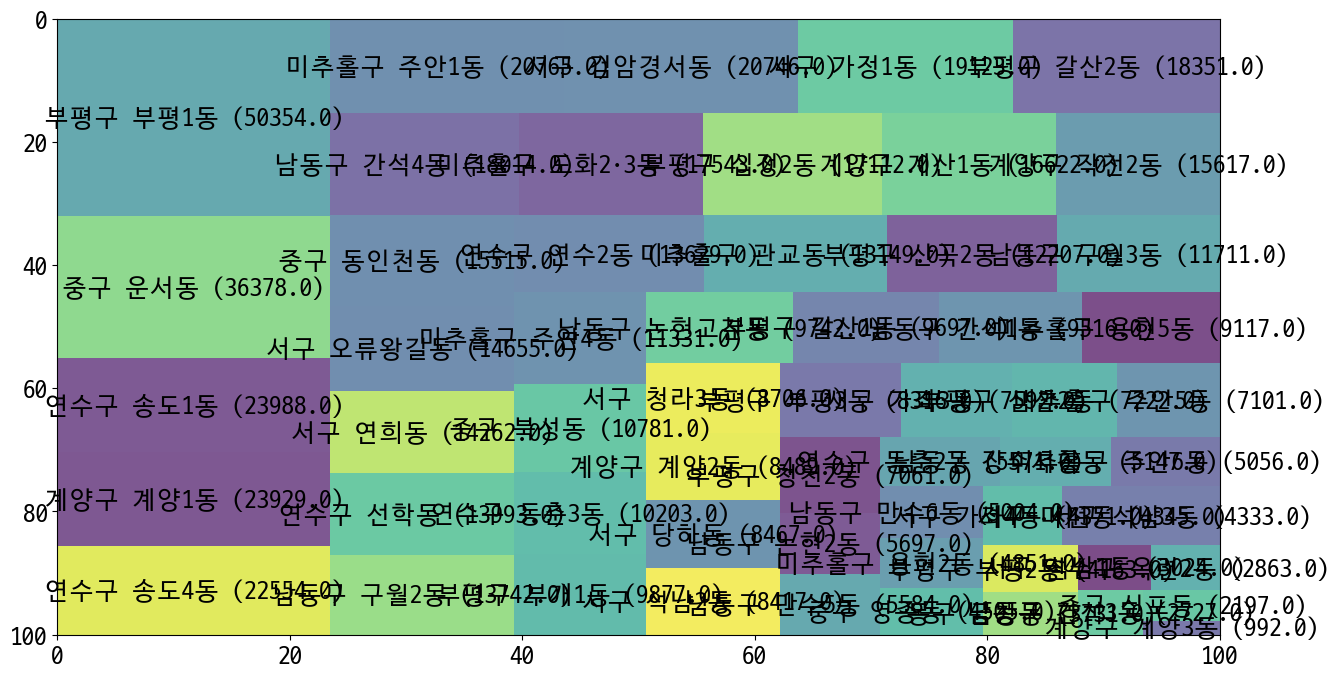

In [15]:
import squarify
import matplotlib.pyplot as plt

df['total'] = df['total'].astype(str).str.replace(',', '').astype(float)
df['total'] = df['total'].fillna(0)
df = df[df['total'] > 0]
labels = [f"{n} ({t})" for n, t in zip(df['name'], df['total'])]

plt.figure(figsize=(15, 8))
squarify.plot(sizes=df['total'], label=labels, alpha=0.7)

plt.rcParams["font.size"] = 18
plt.gca().invert_yaxis()
